# Trouver la position des ennemis

In [1]:
import numpy as np
import matplotlib.pyplot as pl
# from matplotlib.pyplot import rcParams
# rcParams['figure.figsize'] = 20, 20
pl.figure(figsize=(15,13))

# %matplotlib inline
%matplotlib notebook

In [2]:
import os
os.chdir("..")

In [3]:
from src.main.constants import *
import src.main.main_script as mm
import src.main.clustering as clus
import src.main.data_cleansing as dacl
import src.main.output_rendering as outr
from src.retrieve_realistic_measures import get_table_measures
import src.check_hough as chh
import src.check_clustering as chc
from src.main.geometry import Point, Vector
from src.main.table import Square, Table

In [4]:
os.getcwd()
os.chdir("src")

On suppose connaître la position et l'orientation du robot.

In [5]:
robot_position = Point(750, 500)
orientation = np.pi/3

On suppose que la position du robot ennemi est connu. 

In [6]:
opponent_position = Point(-200, 1230)

Notre robot perçoit le robot ennemi selon la distance les séparant et l'orientation de notre robot.

In [7]:
perceived_distance = robot_position.distance(opponent_position)
vect = Vector()
vect.set_by_points(robot_position, opponent_position)
perceived_angle = vect.compute_basis_angle() - orientation

In [8]:
perceived_angle, perceived_distance

(1.4392083819601436, 1198.0818002123228)

En coordonnées cartésiennes dans le repère du robot, ça donne :

In [9]:
np.cos(perceived_angle)*perceived_distance, np.sin(perceived_angle)*perceived_distance

(157.19854476264027, 1187.724133595217)

750 - 500


<IPython.core.display.Javascript object>


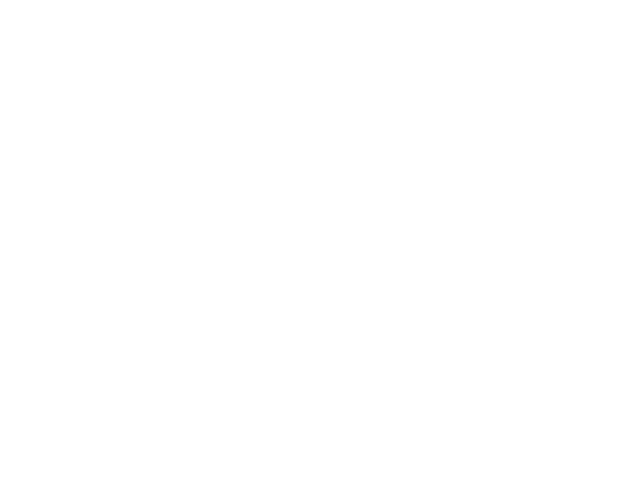

vectors
0.0 0.0
points
-1107.1985447626403 -457.72413359521664


In [10]:
%matplotlib notebook
# table instantiation
table = Table()
table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))

table.add_point(opponent_position)

v_robot_position = Vector()
v_robot_position.set_by_point(robot_position)
print(v_robot_position)
table.add_vector(v_robot_position)

table.translate(-1*v_robot_position)
table.rotate(orientation)

table.init_plot()
table.plot_edges()
table.plot_vectors()
table.plot_points()

# table.plot_point(robot_position)
# table.plot_unitary_vector(robot_position, orientation)
# table.plot_point(opponent_position)


# table.plot_measures(measure, vectors, robot_vector)
table.plot()

750 - 500


<IPython.core.display.Javascript object>


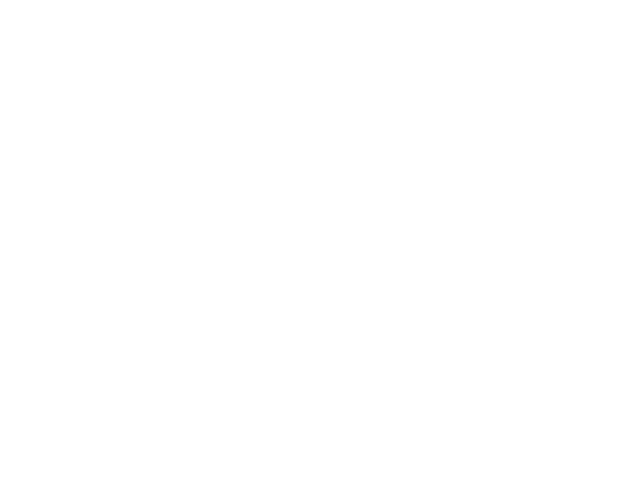

vectors
750 500
points
-200 1230


In [11]:
%matplotlib notebook
# table instantiation
table = Table()
table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))

table.add_point(opponent_position)

v_robot_position = Vector()
v_robot_position.set_by_point(robot_position)
print(v_robot_position)
table.add_vector(v_robot_position)

# table.translate(-1*v_robot_position)
# table.rotate(orientation)

table.init_plot()
table.plot_edges()
table.plot_vectors()
table.plot_points()

# table.plot_point(robot_position)
# table.plot_unitary_vector(robot_position, orientation)
# table.plot_point(opponent_position)


# table.plot_measures(measure, vectors, robot_vector)
table.plot()

750 - 500


<IPython.core.display.Javascript object>


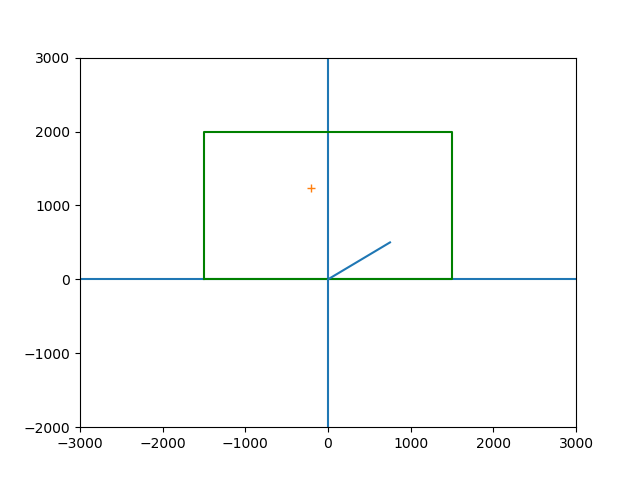

vectors
750.0 500.0
points
-200.0 1230.0


In [12]:
%matplotlib notebook
# table instantiation
table = Table()
table.add_edge_point(Point(-1500, 0))
table.add_edge_point(Point(1500, 0))
table.add_edge_point(Point(1500, 2000))
table.add_edge_point(Point(-1500, 2000))

table.add_point(opponent_position)

v_robot_position = Vector()
v_robot_position.set_by_point(robot_position)
print(v_robot_position)
table.add_vector(v_robot_position)

table.translate(-1*v_robot_position)
table.rotate(orientation)

table.rotate(-orientation)
table.translate(v_robot_position)

table.init_plot()
table.plot_edges()
table.plot_vectors()
table.plot_points()

# table.plot_point(robot_position)
# table.plot_unitary_vector(robot_position, orientation)
# table.plot_point(opponent_position)


# table.plot_measures(measure, vectors, robot_vector)
table.plot()